In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

## Dataset

In [36]:
from sklearn.datasets import load_iris

data = load_iris(as_frame=True)
iris_df  = data.frame
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


## Basic EDA

<Axes: >

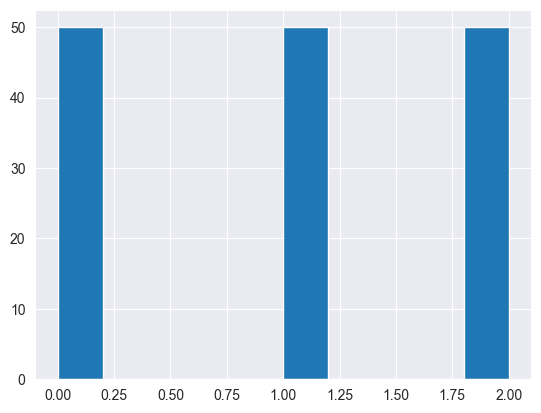

In [38]:
iris_df.target.hist()

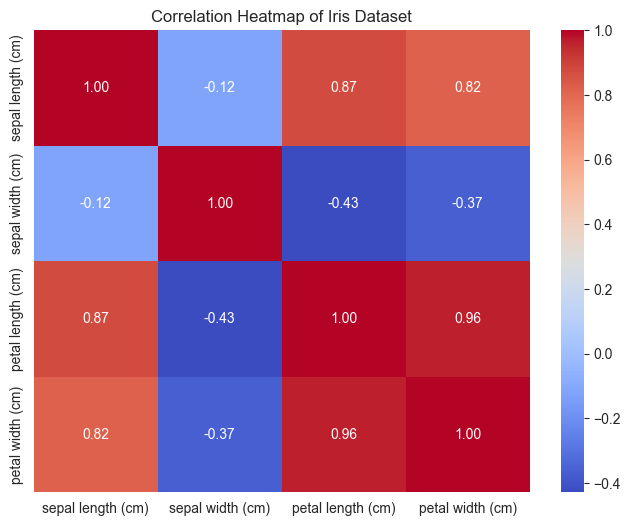

In [40]:
corr_matrix = iris_df.iloc[:,:-1].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()

In [42]:
df = iris_df[["sepal length (cm)", "sepal width (cm)", "target"]]
df.head()

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


<Axes: xlabel='sepal width (cm)', ylabel='Count'>

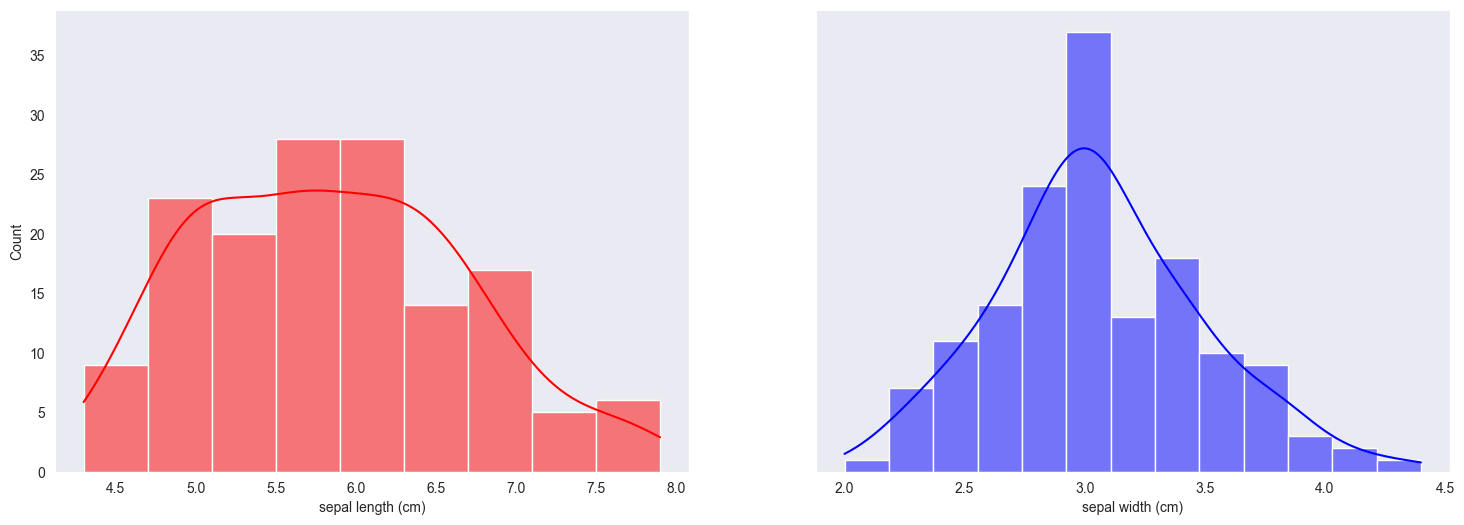

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
sns.histplot(df, ax=axes[0], x="sepal length (cm)", kde=True, color='r')
sns.histplot(df, ax=axes[1], x="sepal width (cm)", kde=True, color='b')

## Calculate P(Y=y)

In [47]:
def prior_prob(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        P = len(df[df[Y]==i]) / len(df)
        prior.append(P)
    return prior

## Calculate P(X=x | Y=y) for Gaussian Dist.

In [48]:
def likelihood_prob(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    P_X_given_y = (1 / (np.sqrt(2 * np.pi * (std ** 2)))) * (np.exp(-((feat_val - mean)/ (2 * (std ** 2)))**2))

    return P_X_given_y

## Calculate P(Y=y) * P(X=x1 | Y= y) * ... * P(X=x_n | Y = y)

In [49]:
def posterior(df,X,Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = prior_prob(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        print("labels", labels)
        likelihood = [1]*len(labels)
        print("len of likelihood", likelihood)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= likelihood_prob(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        print("len of posrt prb", len(post_prob))
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

## Testing

In [57]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = posterior(train, X=X_test, Y="target")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred, average='weighted'))

labels [0, 1, 2]
len of likelihood [1, 1, 1]
len of posrt prb 3
labels [0, 1, 2]
len of likelihood [1, 1, 1]
len of posrt prb 3
labels [0, 1, 2]
len of likelihood [1, 1, 1]
len of posrt prb 3
labels [0, 1, 2]
len of likelihood [1, 1, 1]
len of posrt prb 3
labels [0, 1, 2]
len of likelihood [1, 1, 1]
len of posrt prb 3
labels [0, 1, 2]
len of likelihood [1, 1, 1]
len of posrt prb 3
labels [0, 1, 2]
len of likelihood [1, 1, 1]
len of posrt prb 3
labels [0, 1, 2]
len of likelihood [1, 1, 1]
len of posrt prb 3
labels [0, 1, 2]
len of likelihood [1, 1, 1]
len of posrt prb 3
labels [0, 1, 2]
len of likelihood [1, 1, 1]
len of posrt prb 3
labels [0, 1, 2]
len of likelihood [1, 1, 1]
len of posrt prb 3
labels [0, 1, 2]
len of likelihood [1, 1, 1]
len of posrt prb 3
labels [0, 1, 2]
len of likelihood [1, 1, 1]
len of posrt prb 3
labels [0, 1, 2]
len of likelihood [1, 1, 1]
len of posrt prb 3
labels [0, 1, 2]
len of likelihood [1, 1, 1]
len of posrt prb 3
labels [0, 1, 2]
len of likelihood [1, 1